In [1]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------------------------------- ------ 8.1/9.8 MB 50.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 43.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## **Lineare Regression mit der Methode der kleinsten Quadrate**

Die einfache lineare Regression untersucht den Zusammenhang zwischen einer **unabhängigen Variablen** ($x$) und einer **abhängigen Variablen** ($y$) und findet eine Gerade, die diesen Zusammenhang beschreibt. Ziel ist es, die **Summe der quadrierten Fehler (Residuen)** zwischen den tatsächlichen Werten ($y$) und den vorhergesagten Werten ($\hat{y}$) zu minimieren.

<img src=https://statistikgrundlagen.de/ebook/wp-content/uploads/sites/2/2020/10/Bild7-10.png></img>

### **1. Notationen**

- **$x$:** Die unabhängige Variable (auch **Feature** genannt), die für die Vorhersage verwendet wird.
 
- **$\bar{x}$ :** Der Mittelwert der unabhängigen Variable $x$.
  
- **$y$:** Die abhängige Variable (auch **Zielvariable** genannt), die vorhergesagt werden soll.
 

- **$\bar{y}$ :** Der Mittelwert der abhängigen Variable $y$.
 
- **$\hat{y}$ :** Der durch die Regressionsgerade berechnete Vorhersagewert für $y$ basierend auf $x$.
  

### **2. Ziel der Methode der kleinsten Quadrate**

Die Methode der kleinsten Quadrate minimiert die **Summe der quadrierten Fehler (Residuen)**:
$$
S = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Das Ziel ist, die optimale Gerade $\hat{y} = \beta_0 + \beta_1 x$ zu finden, indem $\beta_0$ (Achsenabschnitt) und $\beta_1$ (Steigung) berechnet werden.



### **3. Formel für die lineare Regressionsgerade**

Die Gleichung der linearen Regressionsgerade lautet:
$$
\hat{y} = \beta_0 + \beta_1 x
$$
Dabei:
- **$\beta_0$:** Achsenabschnitt (Intercept), der den Wert von $y$ angibt, wenn $x = 0$.
- **$\beta_1$:** Steigung (Slope), die angibt, wie stark sich $y$ ändert, wenn $x$ um eine Einheit steigt.



### **4. Berechnung der Koeffizienten**

#### **4.1. Steigung ($\beta_1$):**

Die Steigung wird berechnet als:
$$
\beta_1 = \frac{\text{Kovarianz}(x, y)}{\text{Varianz}(x)}
$$
Entsprechend:
$$
\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

#### **4.2. Achsenabschnitt ($\beta_0$):**

Der Achsenabschnitt wird berechnet als:
$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$


### **5. Die Genauigkeit der Regressionsgeraden und Residuen**

Die Regressionsgerade ist eine **Schätzung**, die versucht, den Zusammenhang zwischen der unabhängigen Variable und der abhängigen Variable zu modellieren. Sie minimiert die Summe der quadrierten Abweichungen zwischen den tatsächlichen Werten  und den vorhergesagten Werten .

Ein **Residuum** $e_i$ ist die Differenz zwischen dem tatsächlichen Wert $y_i$ und dem durch die Regressionsgerade vorhergesagten Wert $\hat{y}_i$:
$$
e_i = y_i - \hat{y}_i
$$
Residuen zeigen die **Ungenauigkeit der Regressionsgeraden**: Sie messen, wie weit der tatsächliche Punkt $y_i$ von der geschätzten Gerade $hat{y}_i$ entfernt ist.


### **6. Beispielrechnung**
#### **6.1 Daten importieren und anzeigen**
Wir betrachten einen Datensatz der Mietpreise und die Größe von Wohnungen enthält.<br>
Wir wollen anhand der Größe den Preis vorhersagen.

In [4]:
df = pd.read_csv("size-rent-4-pandas.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Size    16 non-null     int64
 1   Rent    16 non-null     int64
dtypes: int64(2)
memory usage: 388.0 bytes


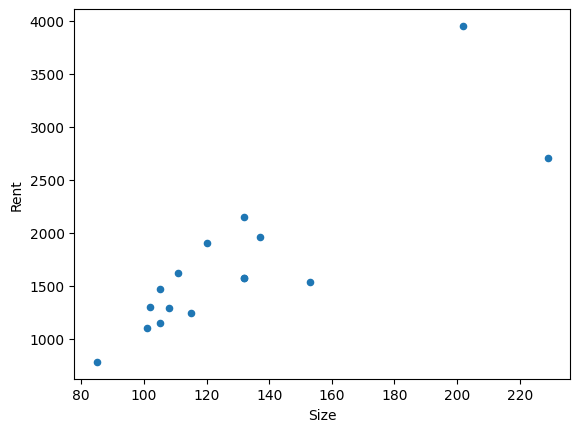

In [5]:
df.plot(x="Size", y="Rent", kind="scatter");

#### **6.2 Koeffizienten $\beta_0$ und $\beta_1$ berechnen**

In [6]:
x = df["Size"]
y = df["Rent"]

# Mittelwerte berechnen
x_mean = x.mean()
y_mean = y.mean()

# Kovarianz und Varianz berechnen
cov_xy = np.sum((x - x_mean) * (y - y_mean))
var_x = np.sum((x - x_mean) ** 2)

# Koeffizienten berechnen
beta_1 = cov_xy / var_x  # Steigung
beta_0 = y_mean - beta_1 * x_mean  # Achsenabschnitt

#### **6.3 Ergebnis darstellen**

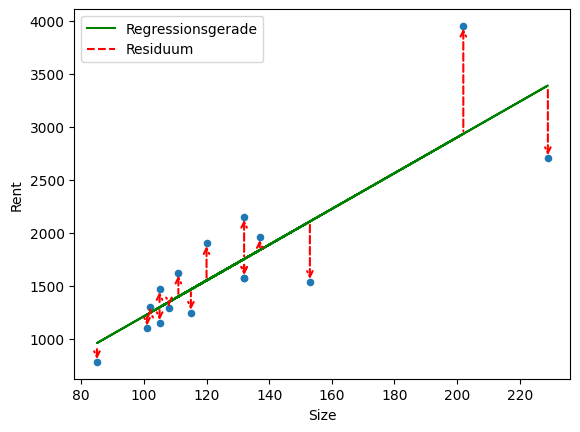

In [7]:
# geschätzer Wert wird mit Hilfe der Koeffizienten berechnet
y_hat = beta_0 + beta_1 * x    

df.plot(x="Size", y="Rent", kind="scatter")
plt.plot(x, y_hat, color="green", label="Regressionsgerade")

# Residuen einzeichnen
for i in range(len(df)):
    plt.annotate(
        "", 
        xy=(x.iloc[i], y_hat.iloc[i]),  
        xytext=(x.iloc[i], df["Rent"].iloc[i]),  
        arrowprops=dict(color='red',linestyle="--", arrowstyle='<-', lw=1.5)
    )
        
# Dummy-Handle für Residuen hinzufügen
plt.plot([], [],linestyle="--", color="red", label="Residuum")    
plt.legend()
plt.show()

## **Vorraussetzungen für lineare Regression**
### **1. Lineare Beziehung zwischen den Variablen**
Es muss eine lineare Beziehung zwischen der unabhängigen Variable
$x$ und der abhängigen Variable $y$ bestehen.<br>
Dies bedeutet, dass sich 
$y$ durch $x$ als $y=\beta_0 +\beta_1 \times x$ beschreiben lässt.<br>

Ein Streudiagramm oder Korrelationskoeffizient (niedrige Werte sprechen gegen eine lineare Beziehung) kann helfen, die Linearisierung zu überprüfen.
Falls die Beziehung nicht linear ist, kann eine Transformation der Variablen (z. B. Logarithmus, Quadratwurzel) sinnvoll sein.

<img src="https://datatab.de/assets/tutorial/regression/lineare_regression_voraussetzungen_linearität.png"></img>

### **2. Homoskedastizität (gleichbleibende Varianz der Residuen)**
Die Residuen sollten über den gesamten Wertebereich von $x$ konstante Varianz aufweisen.<br>
Das bedeutet, dass die Streuung der Residuen unabhängig von den Werten der unabhängigen Variablen ist.

Wir können das mit einem Residualplot (Residuen vs. Vorhersagen) prüfen:
Wenn die Punkte zufällig verteilt sind, ist Homoskedastizität erfüllt, Muster (z. B. Kegel- oder Trichterform) deuten dagegen auf Heteroskedastizität hin.

Was tun bei Verstößen:

- Transformation der abhängigen Variablen (z. B. Logarithmus oder Quadratwurzel).
- Verwenden von Methoden wie der robusten Regression.
<br><br>
![Homoskedastizität](https://datatab.de/assets/tutorial/regression/Lineare_Regression_Homoskedastizit%C3%A4t.png)

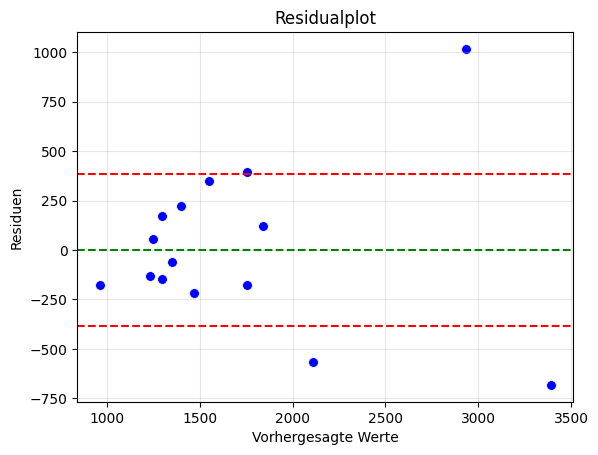

In [9]:
# Residuen berechnen
residuals = df["Rent"] - y_hat

# Residualplot
sns.scatterplot(x=y_hat, y=residuals, color="blue", s=50)
plt.axhline(0, color='green', linestyle='--', linewidth=1.5)  # Null-Linie

# Begrenzungslinien (z. B. bei ±1 Standardabweichungen der Residuen)
residual_std = np.std(residuals)
plt.axhline(residual_std, color='red', linestyle='--', linewidth=1.5)
plt.axhline(-residual_std, color='red', linestyle='--', linewidth=1.5)

plt.title("Residualplot")
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Residuen")
plt.grid(alpha=0.3)
plt.show()

### **3. Die Residuen ($Y - \hat{Y}$) sollten normalverteilt sein.**

Dies ist besonders wichtig für die Validität von Konfidenzintervallen und Hypothesentests.

Wir prüfen das entweder grafisch durch Erstellen eines QQ-Plots bzw. eines Histogramms der Residuen mit eingetragener Dichtekurve (KDE)
oder mit Durchführung eines Normalitätstests (z. B. Shapiro-Wilk-Test, Kolmogorov-Smirnov-Test).

#### **QQPlot**

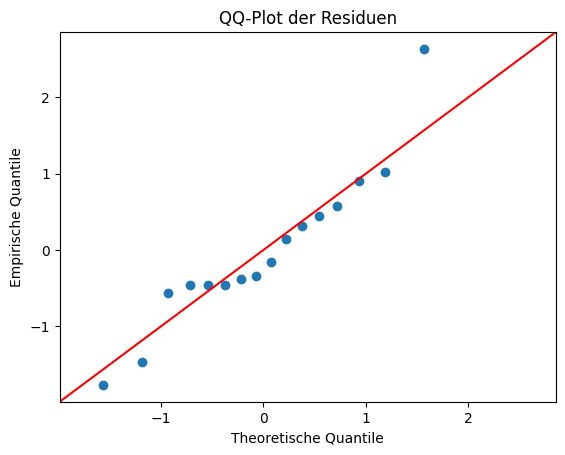

In [10]:
# QQ-Plot erstellen
sm.qqplot(residuals, line="45", fit=True)
plt.title("QQ-Plot der Residuen")
plt.xlabel("Theoretische Quantile")
plt.ylabel("Empirische Quantile")
plt.show()

#### **Histogramm mit Dichtefunktion**

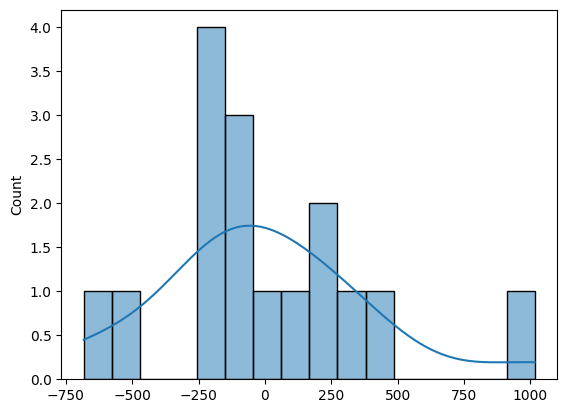

In [11]:
sns.histplot(residuals,bins=len(residuals), kde=True);

### **4. Keine Multikollinearität**
Bei **multipler Regression** sollten die unabhängigen Variablen $x_1, x_2, ... x_k$ nicht stark miteinander korreliert sein.<br>
Hohe Multikollinearität erschwert die Schätzung der Koeffizienten und deren Interpretation.<br>

Wir können das durch Berechnung des Korrelationskoeffizienten zwischen den unabhängigen Variablen.
oder durch Berechnung des Variance Inflation Factor (VIF) überprüfen.<br>

Was tun bei Verstößen:

- Entfernen von stark korrelierten Variablen.
- Verwendung von Techniken wie Ridge- oder Lasso-Regression.


## **Gütekriterien**

In der **linearen Regression** beschreibt die **Gesamtvarianz** der abhängigen Variable $y$, wie stark die Werte von ihrem Mittelwert ($\bar{y}$) abweichen. Diese Gesamtvarianz kann in zwei Teile aufgeteilt werden:

1. **Regressionsvarianz (erklärte Varianz):** Der Teil der Varianz, der durch das Regressionsmodell erklärt wird.
2. **Fehlervarianz (nicht-erklärte Varianz):** Der Teil der Varianz, der nicht durch das Modell erklärt wird und auf zufällige Schwankungen oder andere Einflussfaktoren zurückzuführen ist.


### **Gesamtvarianz:**
Die Gesamtvarianz der Zielvariablen $y$ wird berechnet als:
$$
\text{Gesamtvarianz} = \sum_{i=1}^n (y_i - \bar{y})^2
$$
Sie beschreibt die Summe der quadrierten Abweichungen der tatsächlichen Werte $y_i$ vom Mittelwert $\bar{y}$).


### **Regressionsvarianz (erklärte Varianz):**
Die **Regressionsvarianz** ist der Anteil der Gesamtvarianz, den das Modell durch die Vorhersage erklärt. Sie wird berechnet als:
$$
\text{Regressionsvarianz} = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
$$
Hier ist $\hat{y}_i$ der durch die Regressionsgerade vorhergesagte Wert.
Diese Größe gibt an, wie gut das Modell die Streuung der Daten erklären kann.

Eine hohe Regressionsvarianz bedeutet, dass das Modell die Daten gut beschreibt und ein Großteil der Gesamtvarianz erklärt wird.


### **Fehlervarianz (nicht-erklärte Varianz):**
Die **Fehlervarianz** ist der Rest der Varianz, der nicht durch das Modell erklärt wird. Sie wird berechnet als:
$$
\text{Fehlervarianz} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
Sie beschreibt die Summe der quadrierten Abweichungen der tatsächlichen Werte $y_i$ von den vorhergesagten Werten $\hat{y}_i$.

Eine hohe Fehlervarianz bedeutet, dass das Modell nicht in der Lage ist, die Daten gut zu erklären, und es möglicherweise nicht-linearer Zusammenhänge oder weiterer Einflussfaktoren bedarf.


### **Zusammenhang zwischen den Komponenten:**
Die Gesamtvarianz ($SST$) setzt sich aus der Regressionsvarianz ($SSR$) und der Fehlervarianz ($SSE$) zusammen:
$$
SST = SSR + SSE
$$
- $SST$: Gesamtvarianz $\sum_{i=1}^n (y_i - \bar{y})^2$.
- $SSR$: Regressionsvarianz $\sum_{i=1}^n \hat{y}_i - \bar{y})^2$.
- $SSE$: Fehlervarianz $\sum_{i=1}^n (y_i - \hat{y}_i)^2$.

### **Anwendung: Bestimmtheitsmaß $(R^2$) auch Determinationskoeffizient gennant**
Das **Bestimmtheitsmaß** $R^2$ gibt an, welcher Anteil der Gesamtvarianz durch das Modell erklärt wird:
$$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$$
- $R^2$ liegt zwischen $0$ und $1$:
  - $R^2 = 1$: Das Modell erklärt die gesamte Varianz ($SSE = 0$).
  - $R^2 = 0$: Das Modell erklärt keine Varianz ($SSR = 0$).

Bei einfacher linearer Regression entspricht $R^2$ dem Quadrat des Korrelationskoeffizienten 𝑟 zwischen den vorhergesagten Werten 
$\hat{y}$ und den tatsächlichen Werten $y$.

### **Beispiel:**
Angenommen, die tatsächlichen Werte ($y$) haben eine Gesamtvarianz von 100:
- Das Modell erklärt 80 der Varianz ($SSR = 80$).
- Die restlichen 20 sind Fehlervarianz ($SSE = 20$).

Das Bestimmtheitsmaß wäre:
$$
R^2 = \frac{80}{100} = 0.8
$$
Das bedeutet, das Modell erklärt 80% der Gesamtvarianz, und 20% bleiben unerklärt.



### **Alternative Metriken (die wir benutzen)**
#### **1. Mean Absolute Error (MAE)**
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$
- **Bedeutung:** Der durchschnittliche absolute Fehler zwischen den tatsächlichen Werten $y_i$ und den vorhergesagten Werten $\hat{y}_i$.
- **Eigenschaften:**
  - Einfach zu interpretieren, da der Fehler in derselben Einheit wie die Zielvariable angegeben wird.
  - Robuster gegenüber Ausreißern als MSE.
- **Nachteil:** Große Fehler werden nicht stärker gewichtet.


#### **2. Mean Squared Error (MSE)**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
- **Bedeutung:** Der durchschnittliche quadratische Fehler zwischen den tatsächlichen und vorhergesagten Werten.
- **Eigenschaften:**
  - Bestraft größere Fehler stärker, da sie quadriert werden.
- **Nachteil:** Das Ergebnis ist in quadratischen Einheiten, was die Interpretation erschwert. Kann durch Ausreißer stark beeinflusst werden.


#### **3. Root Mean Squared Error (RMSE)**
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$
- **Bedeutung:** Die Quadratwurzel des MSE, wodurch der Fehler in der gleichen Einheit wie die Zielvariable angegeben wird.
- **Eigenschaften:**
  - Intuitiv interpretierbar.
  - Sensitiver gegenüber großen Fehlern (ähnlich wie MSE).
- **Nachteil:** Kann durch Ausreißer stark beeinflusst werden.
